# Building a Feed-Forward Neural Network From Scratch

In [5]:
import numpy as np
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

%matplotlib inline

## Defining the basic architecture

In [6]:
def init(inp, out):
    """
    This function sets the weight initialisations to zero mean and one SD for the network.
    """
    return np.random.randn(inp, out) / np.sqrt(inp)

def create_architecture(input_layer, first_layer, 
                        output_layer, random_seed=0):
    """
    This function creates a network with an input layer (dimensions defined by the input), a hidden layer, and an output layer
    that performs binary classification.
    """
    np.random.seed(random_seed)
    layers = X.shape[1], 3 , 1
    arch = list(zip(layers[:-1], layers[1:]))
    weights = [init(inp, out) for inp, out in arch]
    return weights

## Creating the essential modules

In [7]:
def sigmoid(z):
    """
    This function returns the sigmoid activation function, which outputs 0 or 1.
    """
    return 1/(1 + np.exp(-z))

def sigmoid_prime(s):
    """
    This function returns the derivative of the sigmoid activation function, which is required during backpropagation.
    """
    return s * (1 -s)

For input values in the range -5 and +5, the function outputs values in the range 0-1, slowly increasing the output of released values until it reaches 0.2 and then growing fast in a linear way until reaching 0.8. It then decreases again as the output rate approaches 1. 

In [8]:
def feed_forward(X, weights):
    """
    This function applies the feed forward to the complete network, eventually arriving at a result in the output layer.
    It performs matrix multiplication between input to each layer and the weights of the connection. Then applies the 
    activation function.
    """
    a = X.copy()
    out = list()
    for W in weights:
        z = np.dot(a, W)
        a = sigmoid(z)
        out.append(a)
    return out

In [9]:
def accuracy(true_label, predicted):
    """
    This function reports the accuracy of the neural network.
    """
    correct_preds = np.ravel(predicted)==true_label
    return np.sum(correct_preds) / len(true_label)

The accuracy function determines whether the neural network is performing predicitions well by comparing the number of correct guesses to the total number of predictions provided.

In [10]:
def back_propagation(l1, l2, weights, y):
    """
    This function performs backpropagation.
    """
    l2_error = y.reshape(-1, 1) - l2
    l2_delta = l2_error * sigmoid_prime(l2)
    l1_error = l2_delta.dot(weights[1].T)
    l1_delta = l1_error * sigmoid_prime(l1)
    return l2_error, l1_delta, l2_delta

def update_weights(X, l1, l1_delta, l2_delta, weights, alpha=1.0):
    """
    This function adjusts the initial weights to represent an updated neural network.
    """
    weights[1] = weights[1] + (alpha * l1.T.dot(l2_delta))
    weights[0] = weights[0] + (alpha * X.T.dot(l1_delta))
    return weights

To perform backpropagation, you first compute the error at the end of each layer. This architecture has two. Using this error, you multiply it by the derivative of the activation function. The result provides you with a gradient, that is, the change in weights neccessary to compute predictions more correctly. The code starts by comparing the output with the correct answers (l2_error), and then computes the gradients, which are the neccessary weight corrections (l2_delta). The code then proceeds to multiply the gradients by the weights the code must correct. The operation distributes the error from the output layer to the intermediate one (l1_error). A new gradient computation (l1_delta) also provides the weight corrections to apply to the input layer, which completes the process for a network with an input layer, a hidden layer, and an output layer. 

To update the weights you add the weights of each layer, the multiplication of the input to that layer, and the delta corrections for the layer as a whole. This is a gradient descent method step in which you approach the solution by taking repeated small steps in the right direction, so you may need to adjust the step size used to solve the problem (alpha parameters). 

In [11]:
def predict(X, weights):
    """
    This function pushes new data using feed forward, reads the last output layer, and transforms its values to predictions.
    """
    _, l2 = feed_forward(X, weights)
    preds = np.ravel((l2 > 0.5).astype(int))
    return preds

## Solving a non-linear problem

The code below uses the Scikit-learn package's make_moons function to create two interleaving circles of points shaped as two half moons. Seperating these two circles requires an algorithm capable of non-linear seperation, such as the neural network defined above. 

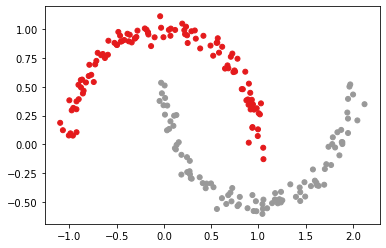

In [38]:
np.random.seed(0)

coord, cl = make_moons(300, noise=0.05) # coord = 300 x 2 array of 2D coords, cl = labels (0 or 1)
X, Xt, y, yt = train_test_split(coord, cl,
                                test_size=0.30, 
                                random_state=0)

plt.scatter(X[:,0], X[:,1], s=25, c=y, cmap=plt.cm.Set1)
plt.show()

The code first sets the random seed to produce the same result anytime you want to run the example. The next step produces 300 data examples and splits them into a train and a test dataset. The data consists of two variables: x and y coords of points on a Cartesian graph.

In [41]:
# creating and initialsing the sets of weights
weights = create_architecture(X, 3, 1)    

In [40]:
for j in range(30000 + 1):

    # First, feed forward through the hidden layer
    l1, l2 = feed_forward(X, weights)
    
    # Then, error back propagation from output to input
    l2_error, l1_delta, l2_delta = back_propagation(l1, l2, weights, y)
    
    # Finally, updating the weights of the network
    weights = update_weights(X, l1, l1_delta, l2_delta, weights, alpha=0.05)
    
    # From time to time, reporting the results
    if (j % 5000) == 0:
        train_error = np.mean(np.abs(l2_error))
        print('Epoch {:5}'.format(j), end=' - ')
        print('error: {:0.4f}'.format(train_error), end= ' - ')
        
        train_accuracy = accuracy(true_label=y, predicted=(l2 > 0.5))
        test_preds = predict(Xt, weights)
        test_accuracy = accuracy(true_label=yt, predicted=test_preds)
        
        print('acc: train {:0.3f}'.format(train_accuracy), end= ' | ')
        print('test {:0.3f}'.format(test_accuracy))

Epoch     0 - error: 0.5077 - acc: train 0.462 | test 0.656
Epoch  5000 - error: 0.0991 - acc: train 0.952 | test 0.944
Epoch 10000 - error: 0.0872 - acc: train 0.952 | test 0.944
Epoch 15000 - error: 0.0803 - acc: train 0.962 | test 0.956
Epoch 20000 - error: 0.0765 - acc: train 0.967 | test 0.956
Epoch 25000 - error: 0.0732 - acc: train 0.967 | test 0.956
Epoch 30000 - error: 0.0740 - acc: train 0.948 | test 0.956


The code loops 30,000 epochs of the two half moons data, summarising the neural network error by examining its accuracy on the training set and on the test set. The accuracy on the training set shows how well the neural network is fitting the data by adapting its parameters by the backpropagation process. The accuracy on the test set provides an idea of how well the solution generalised to new data and thus whether you can reuse it. 

**The test accuracy is the most important because it shows the potential usability of the neural network with other data.**